In [1]:
import gym
import mujoco_maze
import matplotlib.pyplot as plt
import numpy as np

ModuleNotFoundError: No module named 'mujoco_maze'

In [2]:
env = gym.make('PointUMaze-v0')

In [29]:
steps = 0
done = False
reward = 0
env.reset()
states = []
trajectory = []
while not done:
    action = env.action_space.sample()
    n_s, r, done, _ = env.step(action)
    steps += 1
    reward += r
    trajectory.append(n_s[:2])
    states.append(n_s[:-1])
print('steps taken: {} | reward gotten: {}'.format(steps, reward))

steps taken: 1000 | reward gotten: -0.10000000000000184


In [17]:
from scipy.spatial.distance import minkowski

In [30]:
d = []
for i in range(len(states)-1):
    d.append(minkowski(states[i], states[i+1]))

In [31]:
np.mean(d)

0.996460665615996

In [59]:
env.reset()

array([-0.01607398, -0.05345802,  0.04534686,  0.11084207,  0.05374715,
       -0.21322189,  0.        ])

In [87]:
x = [i[0] for i in trajectory]
y = [i[1] for i in trajectory]

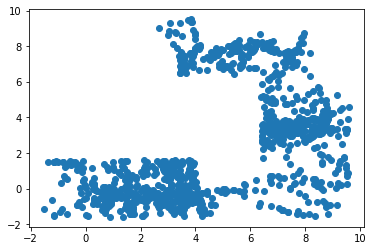

In [88]:
plt.scatter(x, y)

In [1]:
import numpy as np

In [6]:
f = np.load('./test.npy', allow_pickle=True)

(array([ 164.,  156.,  173.,  380.,  461.,  730., 1850., 3286., 1507.,
         122.]),
 array([0.00130103, 0.09357611, 0.1858512 , 0.27812629, 0.37040137,
        0.46267646, 0.55495154, 0.64722663, 0.73950172, 0.8317768 ,
        0.92405189]),
 <a list of 10 Patch objects>)

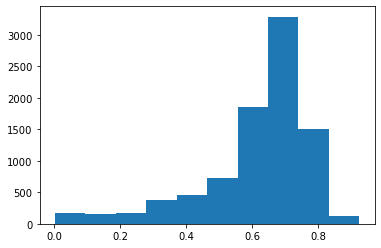

In [41]:
plt.hist(f.any()['returns'])

# test for noise adding/epsilon greedy

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
action = np.random.normal(0,1,size=(100,2))

In [10]:
x = [a[0] for a in action]
y = [a[1] for a in action]

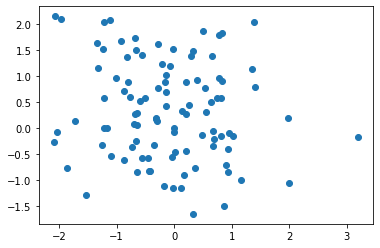

In [11]:
plt.scatter(x=x, y=y)

In [12]:
num_steps = 10000

### decayed e-greedy plus fixed noise

In [50]:
actions = []
eps_start = 0.9
eps_end = 0.1
decay_steps = 10000
for n in range(num_steps):
    eps = max(eps_end, eps_start - (eps_start - eps_end) / decay_steps * n)
    if np.random.rand() < eps:
        action = np.random.normal(0, 1, size=2)
        noise = np.random.normal(0, 1, size=2)
        action += noise
    else:
        action = np.random.normal(0, 1, size=2)
    actions.append(action)

In [51]:
x = [a[0] for a in actions]
y = [a[1] for a in actions]

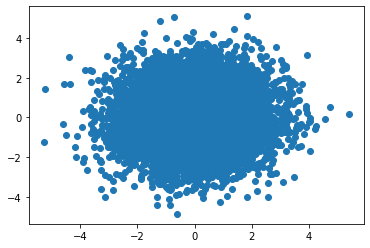

In [52]:
plt.scatter(x=x, y=y)

### decayed noise

In [82]:
actions = []
noise_start = 1.5
noise_end = 1
decay_steps = 10000
for n in range(num_steps):
    noise = max(noise_end, noise_start - (noise_start - noise_end) / decay_steps * n)
    action = np.random.normal(0, 1, size=2)
    normal_noise = np.random.normal(0, noise, size=2)
    action += normal_noise
    
    actions.append(action)

In [83]:
x = [a[0] for a in actions]
y = [a[1] for a in actions]

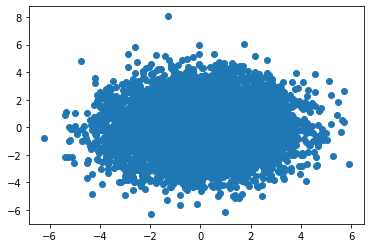

In [84]:
plt.scatter(x=x, y=y)

### visualize action training process

In [14]:
from matplotlib.patches import Rectangle,Circle,Arrow

import math

In [24]:
def plot_actions(actions, state_pos, width=15, height=10):
    fig, ax = plt.subplots()
    ax.set_xlim([0, width])
    ax.set_ylim([0, height])
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)
    for x in range(width):
        for y in range(height):
            ax.add_patch(Rectangle((x, y),1,1, linewidth=0, facecolor='white'))
            ax.add_patch(Rectangle((x, y),1,1, linewidth=0.5, edgecolor='k', fill=False))
    ax.axvline(0,0,height,linewidth=5,c='k')
    ax.axvline(width,0,height,linewidth=5,c='k')
    ax.axhline(0,0,width,linewidth=5,c='k')
    ax.axhline(height,0,width,linewidth=5,c='k')
    arrows = []
    for action, pos in zip(actions, state_pos):
        plot_loc = np.array(pos) + 0.5
        direction_x = np.cos(action[1] + env.env.get_ori()) * (action[0])
        direction_y = np.sin(action[1] + env.env.get_ori()) * (action[0])
        arrow = Arrow(plot_loc[0], plot_loc[1], direction_x, direction_y, width=0.5, color='k')
        ax.add_patch(arrow)
        arrows.append(arrow)
    #plt.show()
    return fig, ax

In [11]:
width = 15
height = 10
actions = np.random.rand(width * height, 2)

In [12]:
state_pos = []
for x in range(width):
    for y in range(height):
        state_pos.append(np.array((x, y)))

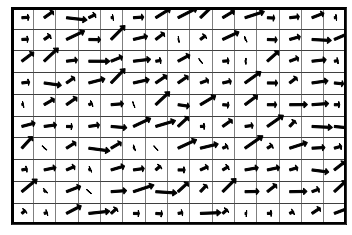

In [25]:
fig = plot_actions(actions, state_pos)

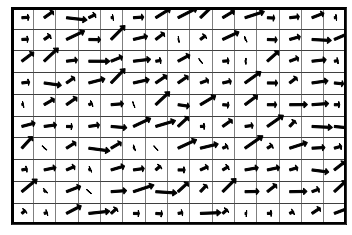

In [30]:
fig[0]

In [4]:
env = gym.make('PointUMaze-v1')

In [5]:
env.observation_space

Box([ -2.         -2.         -3.1415927 -12.        -12.        -12.
        -inf], [10.        10.         3.1415927 12.        12.        12.
        inf], (7,), float32)

In [6]:
env.action_space

Box([-1.   -0.25], [1.   0.25], (2,), float32)

### SAC

In [2]:
import gym
#import mujoco_maze

from stable_baselines3 import SAC
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle,Circle,Arrow
import numpy as np
import torch

In [83]:
model50k = SAC.load('./saved_model/model50k.zip')

In [84]:
model5k = SAC.load('./saved_model/model5k.zip')

In [85]:
model100k = SAC.load('./saved_model/model100k.zip')

In [8]:
model500k = SAC.load('./saved_model/model500k.zip')

In [4]:
def plot_retuns(sac):

    fig, ax = plt.subplots()
    width = (-2, 10)
    height = (-2, 10)
    ax.set_xlim(width)
    ax.set_ylim(height)
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)
    for x in np.arange(-2, 10):
        for y in np.arange(-2, 10):
            ax.add_patch(Rectangle((x, y),1,1, linewidth=0, facecolor='white'))
            ax.add_patch(Rectangle((x, y),1,1, linewidth=0.5, edgecolor='k', fill=False))
            ax.axvline(width[0],0,height[1],linewidth=5,c='k')
            ax.axvline(width[1],0,height[1],linewidth=5,c='k')
            ax.axhline(width[0],0,width[1],linewidth=5,c='k')
            ax.axhline(height[1],0,width[1],linewidth=5,c='k')
        for x in np.arange(-2, 10):
            for y in np.arange(-2, 10):
                if -2 <= x <= 6 and 2 <= y <= 6:
                    continue
                pos = (x, y)
                #ori = 0
                for ori in np.arange(-3.14, 3.14, step=0.3):
                    state = np.array((x, y, ori))
                    action = sac.actor.forward(torch.Tensor(state).unsqueeze(0))
                    value = sac.critic.forward(torch.Tensor(state).unsqueeze(0), action)
                    value = min(value)
                    #print('value: {} | action: {}'.format(value.item(), action))
                    plot_loc = np.array(pos) + 0.5
                    #direction_x = np.cos(ori) * np.clip(value.item(), 0, 0.5)
                    #direction_y = np.sin(ori) * np.clip(value.item(), 0, 0.5)
                    direction_x = np.cos(ori) * value.item()
                    direction_y = np.sin(ori) * value.item()
                    arrow = Arrow(plot_loc[0], plot_loc[1], direction_x, direction_y, width=0.05, color='k')
                    ax.add_patch(arrow)

    #return fig

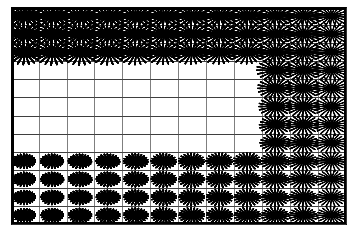

In [82]:
plot_retuns(model100k)

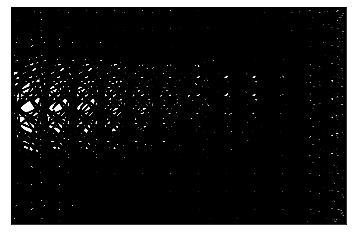

In [86]:
plot_retuns(model5k)

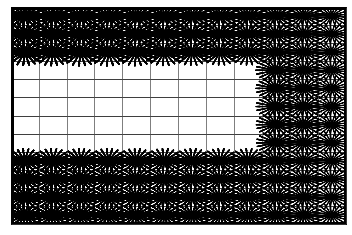

In [87]:
plot_retuns(model50k)

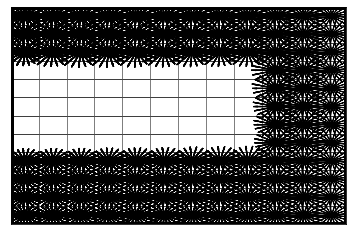

In [9]:
plot_retuns(model500k)